In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 5.50829912, -1.94061277],
       [-0.27529344, -4.22842793],
       [-0.09826604, -4.9966992 ],
       ...,
       [ 2.94664241, -6.16511347],
       [-0.82471473, -3.89330252],
       [ 4.08302156, -1.81900925]])

In [4]:
y

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 1,
       1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1,
       1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1,
       2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 1,
       0, 0, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2,
       1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 0,

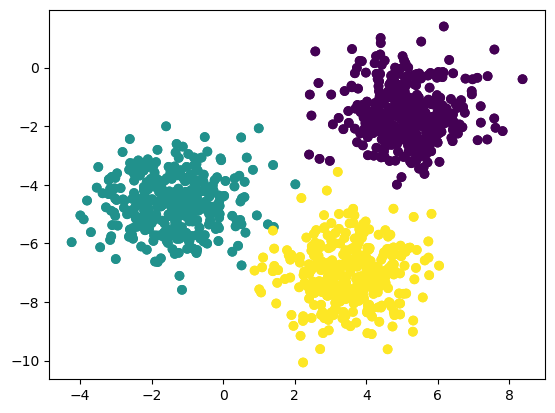

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [7]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.0000000000005,
 600.2641199709767,
 183.63024472771974,
 161.08548928896028,
 138.50559836003217,
 128.52263014806982,
 108.13414461100975,
 94.96491399791321,
 81.34552955199588,
 76.17984014489448]

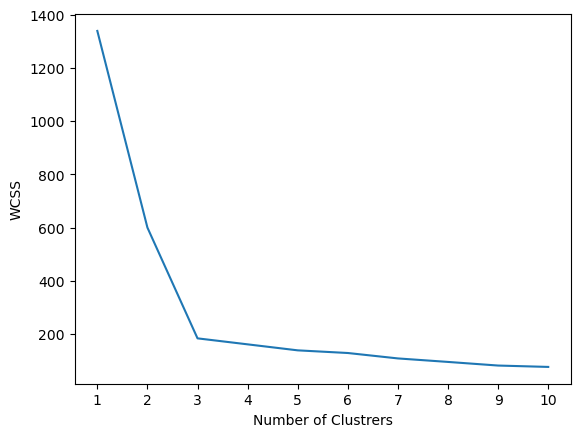

In [14]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

array([0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 1, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1,
       1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 1, 1, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 2,
       1, 1, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1,
       1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0,

In [17]:
y_pred=kmeans.predict(X_test_scaled)

In [18]:
y_pred

array([1, 2, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 0, 2, 1, 2, 1, 1, 2, 2, 0, 1,
       0, 0, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 2, 1,
       1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0,
       1, 2, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0,
       0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 2,
       2, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2,
       0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0,
       2, 1, 2, 0, 2, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1,

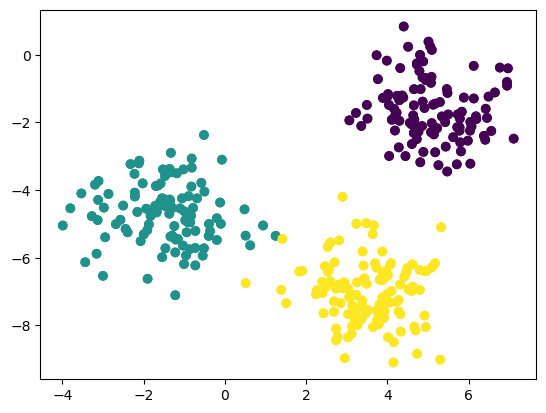

In [20]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)
plt.show()

In [21]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [22]:
## kneelocator
!pip install kneed

In [23]:
from kneed import KneeLocator

In [24]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [25]:
kl.elbow

3

In [26]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [27]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [28]:
silhouette_coefficients

[0.541796254020652,
 0.6740258569936152,
 0.5410733006062404,
 0.533317300323546,
 0.4190917499149462,
 0.43460779288738705,
 0.3265690179278805,
 0.31487952327156005,
 0.3266181693120656]

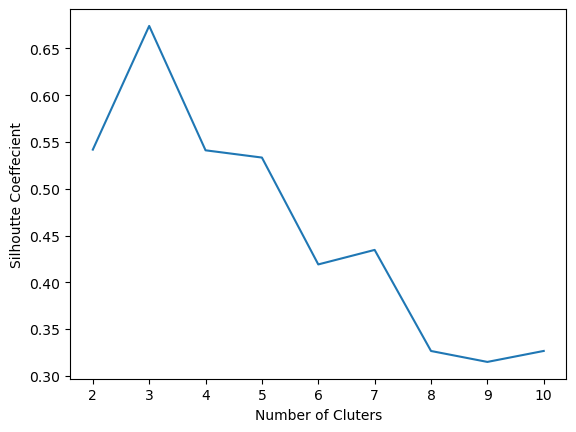

In [29]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()